### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs in as DataFrames

In [2]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb_data = Path("./Resources/fb_data.csv")
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr_data = Path("./Resources/twtr_data.csv")
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap_data = Path("./Resources/snap_data.csv")
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("./Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis='columns', join='inner')

# Sort datetime index in ascending order (past to present)0
combined_df.sort_index(ascending=True)

# Set column names to 'AMZN' and 'S&P 500'
combined_df.columns = ['FB', 'TWTR', 'SNAP', 'S&P 500']

# Display a few rows
combined_df.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2019-05-17,185.30,37.50,11.49,2859.530029
2019-05-16,186.99,38.30,11.42,2876.320068
2019-05-15,186.27,37.90,10.66,2850.959961
2019-05-14,180.73,36.93,10.49,2834.409912
2019-05-13,181.54,36.59,10.11,2811.870117


### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head().dropna()

,FB,TWTR,SNAP,S&P 500
date,,,,
2019-05-16,0.009120,0.021333,-0.006092,0.005872
2019-05-15,-0.003850,-0.010444,-0.066550,-0.008817
2019-05-14,-0.029742,-0.025594,-0.015947,-0.005805
2019-05-13,0.004482,-0.009207,-0.036225,-0.007952


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [5]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
def calc_covariance(df, key):
    return df[key].cov(df['S&P 500'])

snap_cov = calc_covariance(daily_returns, 'SNAP')
fb_cov = calc_covariance(daily_returns, 'FB')
twtr_cov = calc_covariance(daily_returns, 'TWTR')

fb_cov

9.05713329297544e-05

### Calculate Variance of S&P 500 Returns

In [6]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

7.065620867765688e-05

### Calculate Beta Values of Social Media Stocks

In [7]:
# Calculate beta of all daily returns of social media stocks
fb_beta = fb_cov / variance
twtr_beta = twtr_cov / variance
snap_beta = snap_cov / variance

print(f"FB {fb_beta} | TWTR {twtr_beta} | SNAP {snap_beta}")

FB 1.2818595085246223 | TWTR 1.5193591987729473 | SNAP 1.1525883660496732


### Calculate 30-Day Rolling Betas of AMZN Returns vs. S&P 500 Returns

In [8]:
def calc_covariance_window(df, key):
    return df[key].rolling(window=30).cov(df['S&P 500'])


# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_fb = calc_covariance_window(daily_returns, 'FB')
rolling_snap = calc_covariance_window(daily_returns, 'SNAP')
rolling_twtr = calc_covariance_window(daily_returns, 'TWTR')
# Calculate 30-day rolling variance of AMZN vs. S&P 500 and plot the data
rolling_variance = daily_returns['S&P 500'].rolling(window=20).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_beta_fb = rolling_fb / rolling_variance
rolling_beta_snap = rolling_snap / rolling_variance
rolling_beta_twtr = rolling_twtr / rolling_variance

rolling_beta_twtr

date
2019-05-17         NaN
2019-05-16         NaN
2019-05-15         NaN
2019-05-14         NaN
2019-05-13         NaN
                ...   
2017-03-08    0.820977
2017-03-07    0.674730
2017-03-06    0.791292
2017-03-03    0.850315
2017-03-02    0.683786
Length: 557, dtype: float64

### Plot Rolling 30-Day Betas of Social Media Stocks

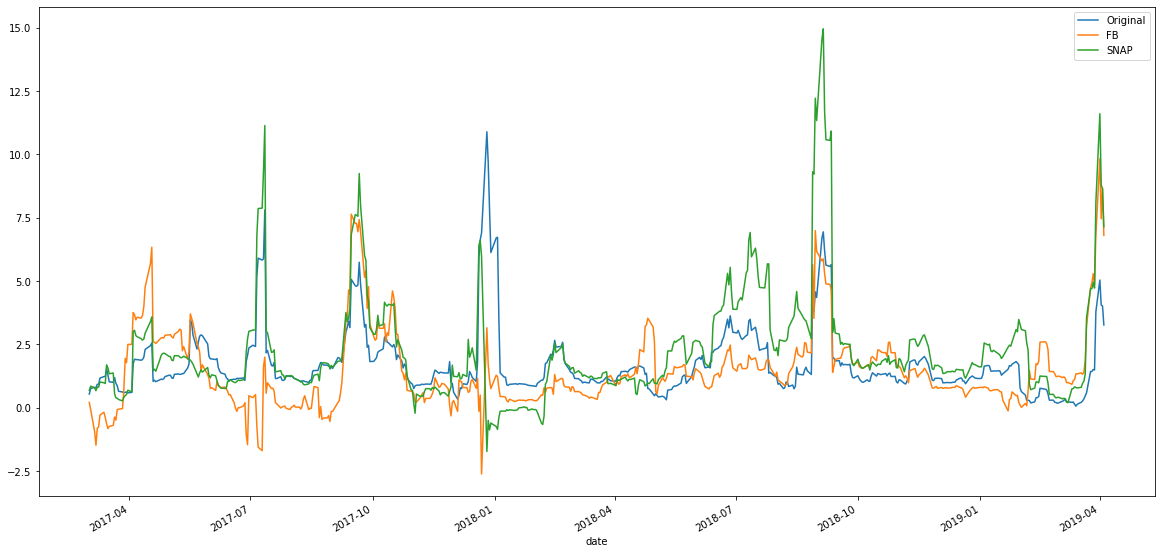

In [9]:
# Set the figure and plot the different datasets as multiple trends on the same figure
existing_plot = rolling_beta_fb.plot(figsize=(20,10))
rolling_beta_snap.plot(ax=existing_plot)
rolling_beta_twtr.plot(ax=existing_plot)

# Set the legend of the figure
existing_plot.legend(['Original', 'FB', 'SNAP', 'TWTR'])